# Dynamical Systems Theory in Machine Learning & Data Science
# Name:- Kaushal Kumar 

# 1. Logistic Map

# 1.1 Plot the cobweb 

In [1]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt



def plot_cobweb(f, r, x0, nmax=30):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    dpi = 100
    x = np.linspace(0, 1, 500)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, r), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], r)
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x)$')
    ax.set_title('$x_0 = {:.1}, r = {:.3}$'.format(x0, r))


Define the logistic function 

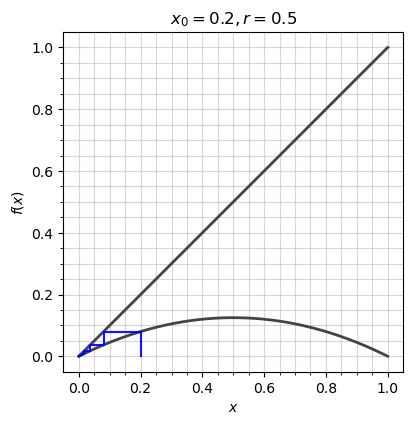

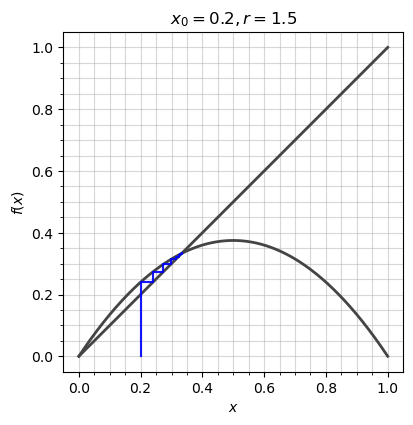

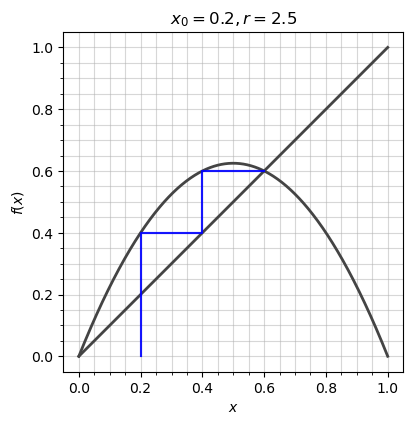

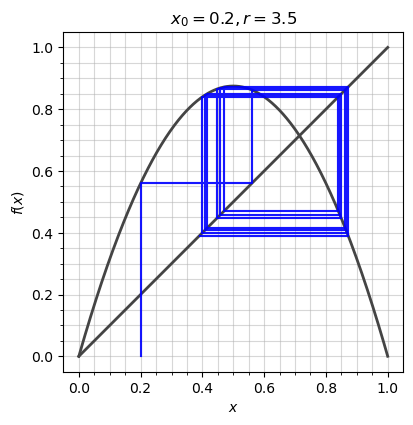

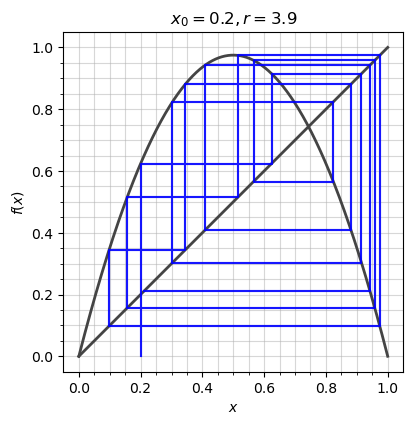

In [2]:
def f(x,r):
    return r*x*(1-x)

# Initial condition
x0=0.2
plot_cobweb(f,0.5,x0)
plot_cobweb(f,1.5,x0)
plot_cobweb(f,2.5,x0)
plot_cobweb(f,3.5,x0)
plot_cobweb(f,3.9,x0)

The plot can reveal stable, cyclic, or chaotic behaviour as convergence to a point, a repeating rectangle or by filling the plane with non-repeating line segments respectively.

# 5. Trajectories in the logistic map

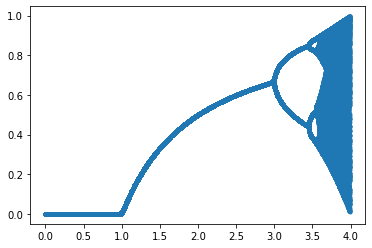

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pylab


def f(x, r):
    #logistic equation with parameter r
    return r*x*(1-x)

if __name__ == '__main__':
    # initial condition for x
    ys = []
    rs = np.linspace(0, 3.99, 2000)

    # Loop through `rs`. `r` is assigned the values in `rs` one at a time. 
    for r in rs:
        x = 0.2
        # Repeat this loop 100 times. 
        for i in range(100):
            # Evaluate f at (x, r). The return value is assigned to x.
            # x is then fed back into f(x, r). 
            # r remains fixed.
            x = f(x, r)

        # Do this 100 times
        for i in range(100):
            # Again make the x jump around according to the logistic equation
            x = f(x, r)
            # Save the point (r, x) in the list ys
            ys.append([r, x])

    # ys is a list of lists.
    # ys as a list of [r, x] point.
    # This converts the list of lists into a 2D numpy array.
    ys = np.array(ys)

    # ys[:,0] is a 1D array of r values
    # ys[:, 1] is a 1D array of x values
    # This draws a scatter plot of (r, x) points.
    pylab.plot(ys[:,0], ys[:,1], '.')
    pylab.show()